<a href="https://colab.research.google.com/github/anaslovic/stablecoins/blob/main/The_analysis_of_trends_of_stable_coins_at_times_of_market_instability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  The analysis of trends of stable coins at times of market instability

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import entropy
from datetime import datetime
import seaborn as sns
import pandas as pd
import os

In [1]:
!git clone https://github.com/anaslovic/stablecoins


Cloning into 'stablecoins'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 1.91 MiB | 9.20 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import pandas as pd
from datetime import datetime

def read_coin_data(coin_name):
    coin_file_path = f'/{coin_name}.csv'

    # Read data for the coin
    coin_full = pd.read_csv(coin_file_path)
    coin_full.columns = ['Date', 'priceOpen', 'priceHigh', 'priceLow', 'priceClose', 'Volume']
    #coin_full['Date'] = pd.to_datetime(coin_full['Date'])
    coin_full = coin_full.fillna(method="ffill", axis=0)
    coin_full = coin_full.fillna(method="bfill", axis=0)
    coin_full = coin_full.set_index('Date')

    #display(coin_full.info())

    return coin_full.copy()

# List of coin names
coin_names = ['Frax', 'TrueUSD-', 'Ampleforth', 'Susd', 'TerraClassicUSD', 'USDC', 'Dai', 'Tether-USDT', 'Pax-gold']

# Dictionary to store coin DataFrames
coin_data_dict = {}

# Loop through each coin name and read data
for coin_name in coin_names:
    coin_data_dict[coin_name] = read_coin_data(coin_name)

# Example" Access data for 'Dai'
dai_data = coin_data_dict['Dai']
print(dai_data)

FileNotFoundError: [Errno 2] No such file or directory: '/Frax.csv'

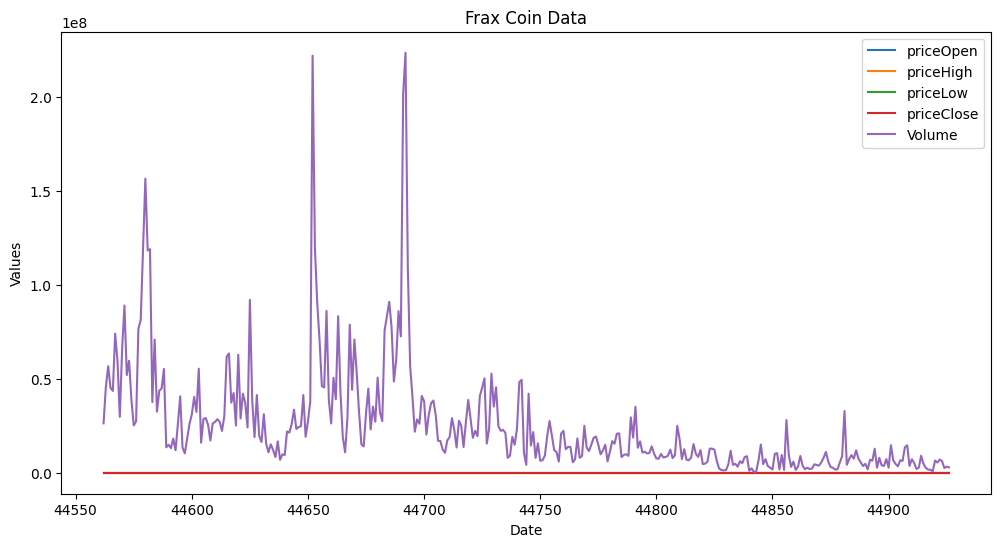

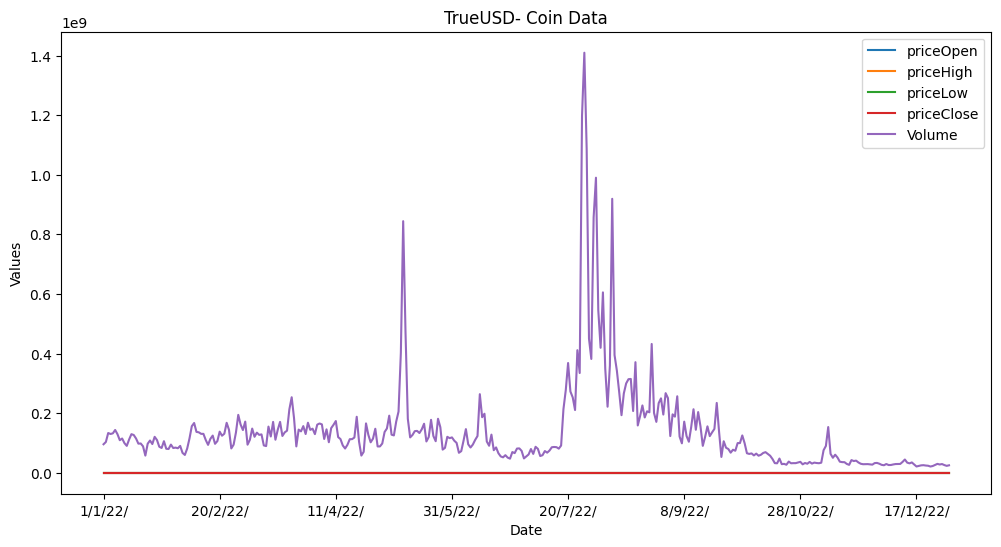

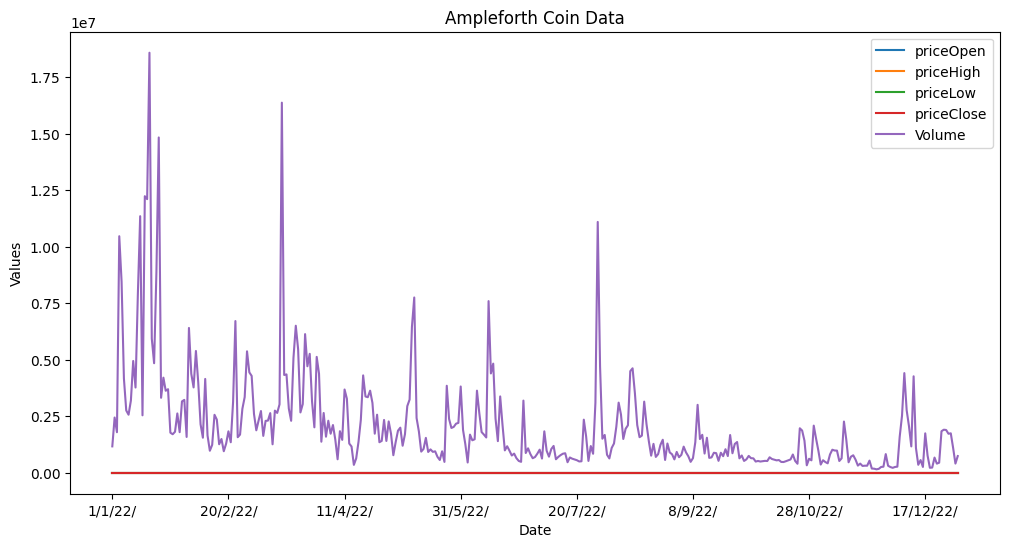

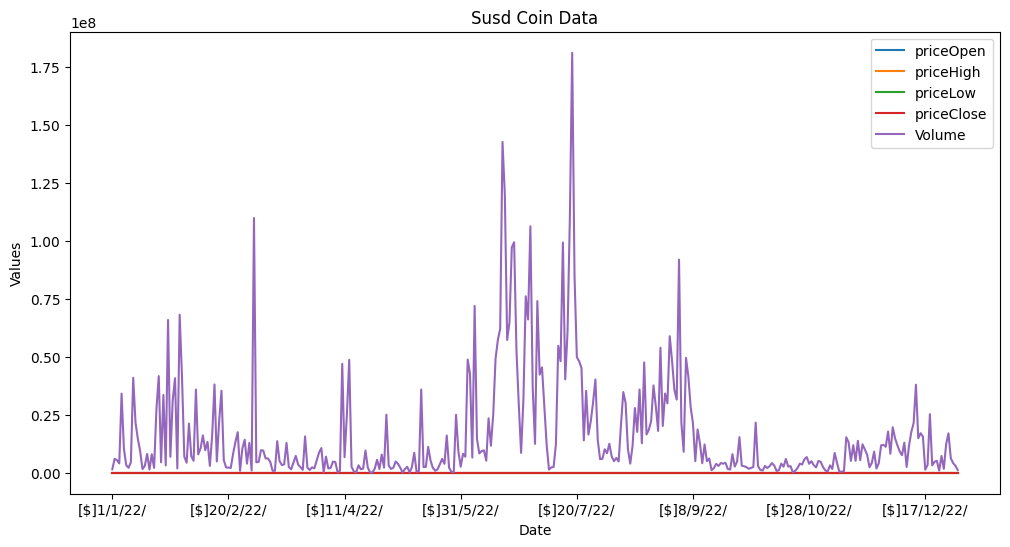

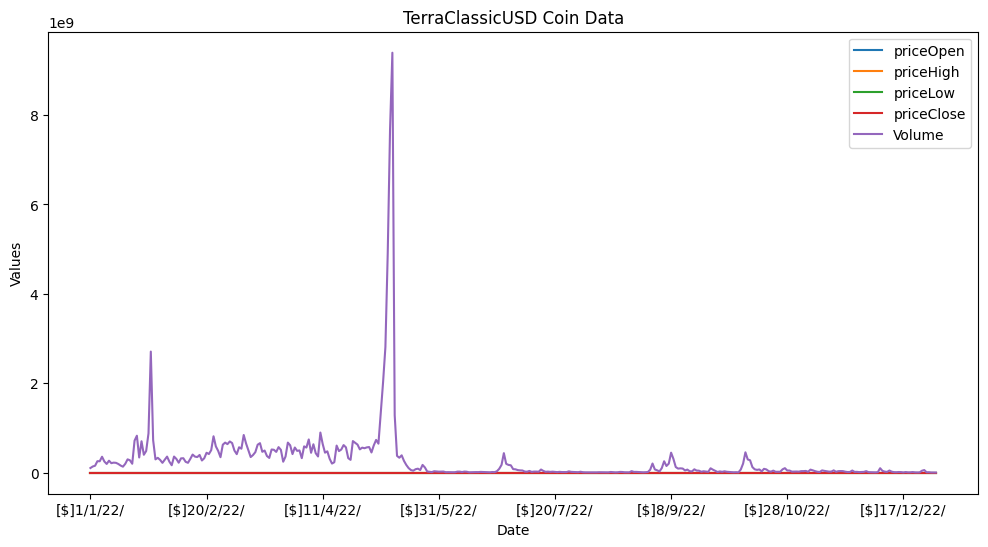

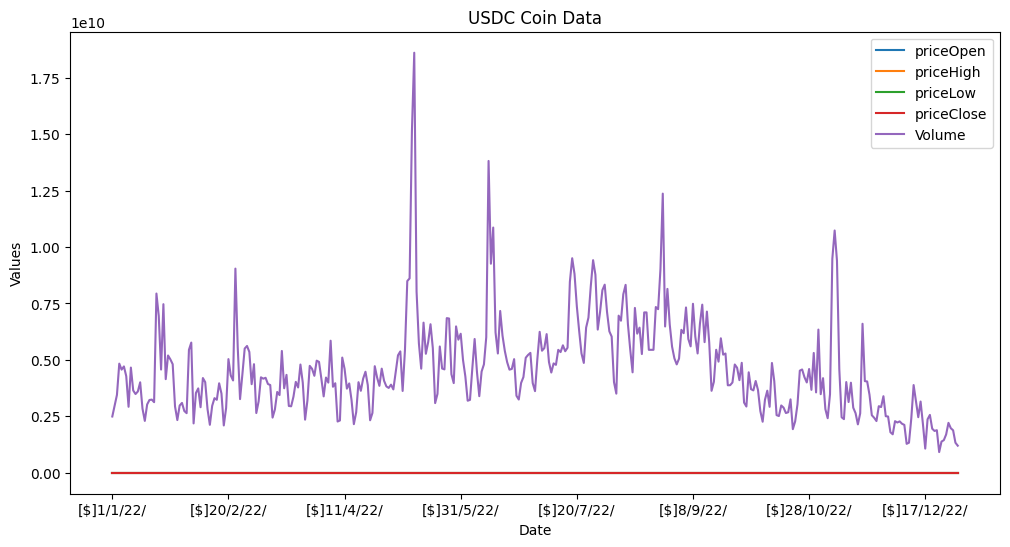

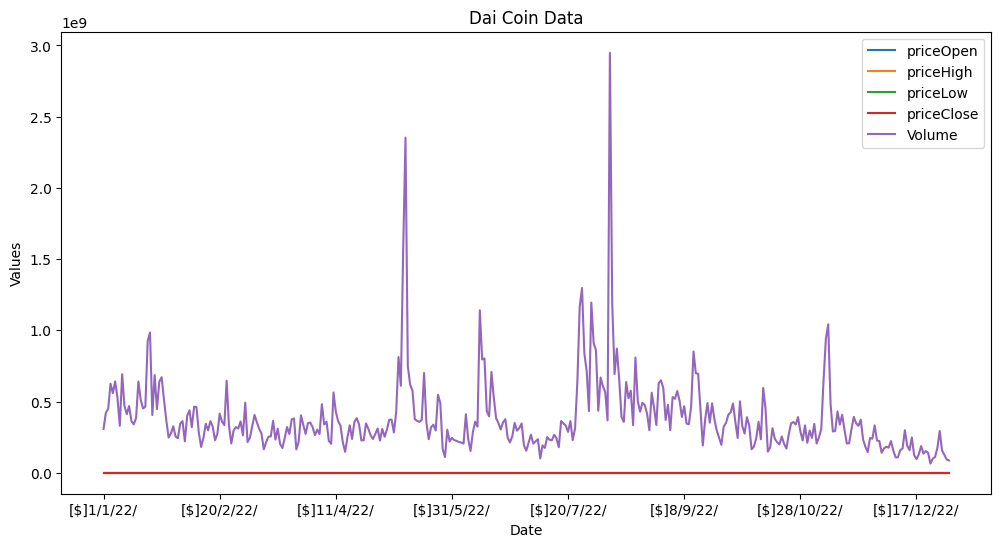

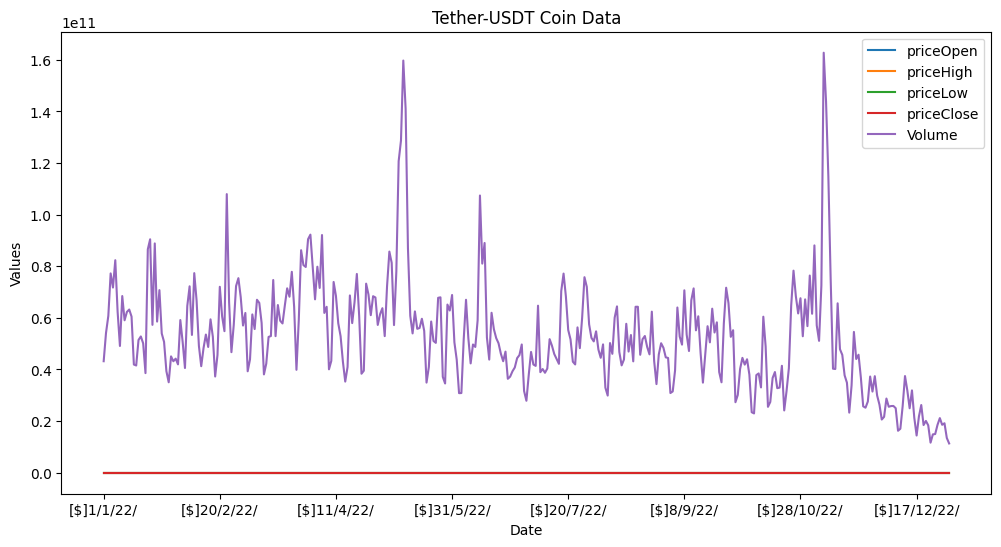

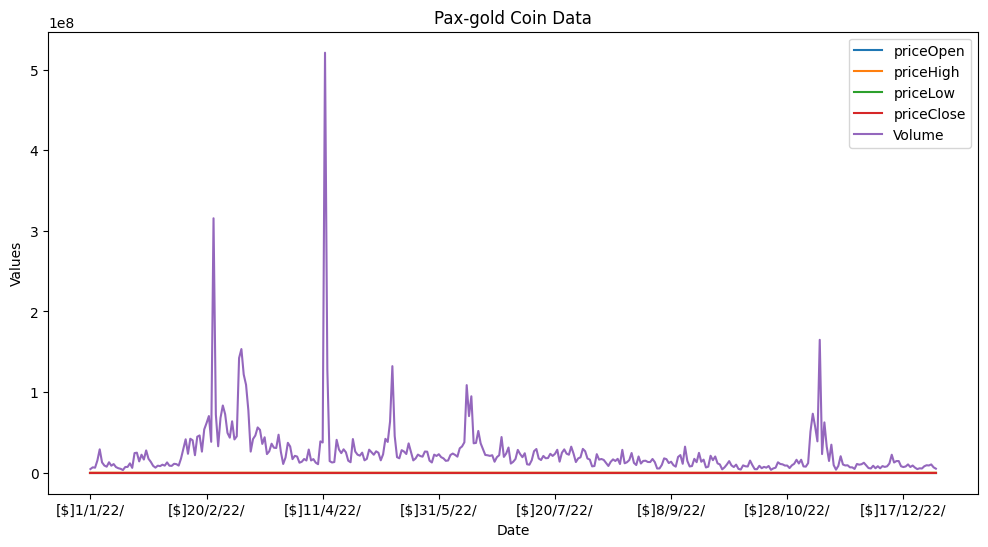

In [ ]:

import matplotlib.pyplot as plt

selected_columns = ['priceOpen', 'priceHigh', 'priceLow', 'priceClose', 'Volume']

# Loop through each coin and plot the selected columns
for coin_name, coin_data in coin_data_dict.items():
    coin_data[selected_columns].plot(title=f'{coin_name} Coin Data', xlabel='Date', ylabel='Values', figsize=(12, 6))
    plt.show()

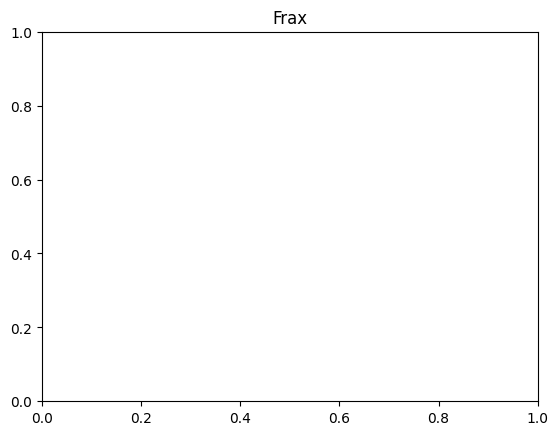

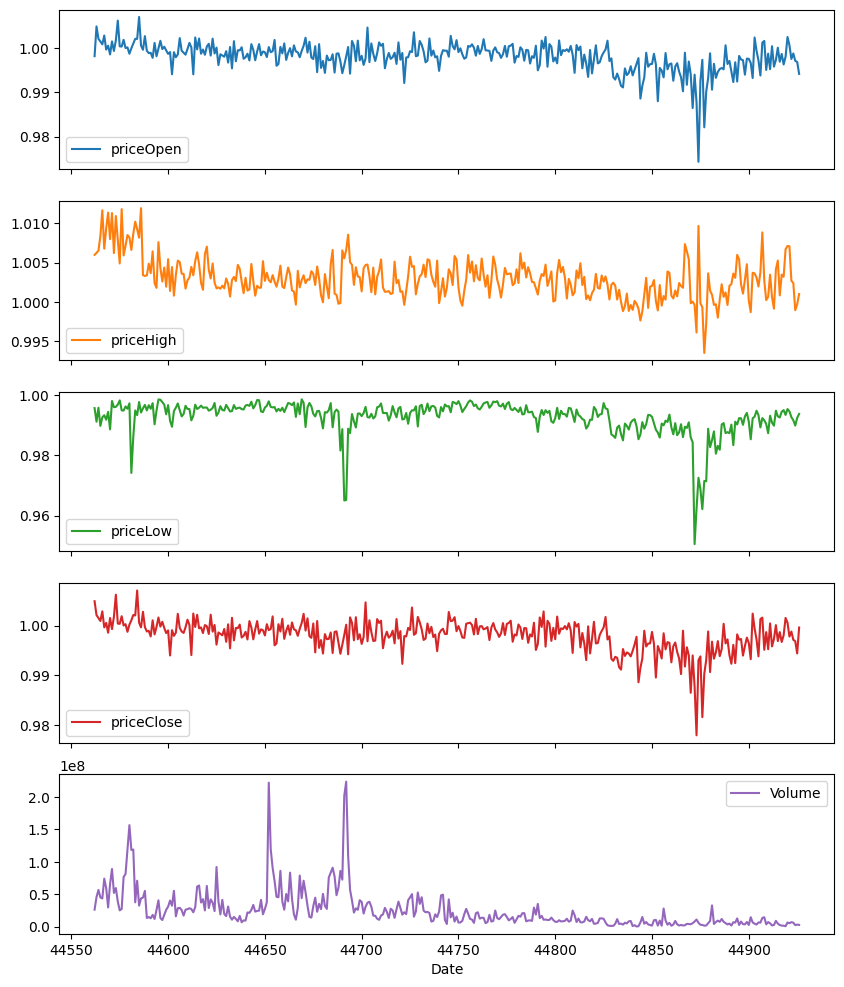

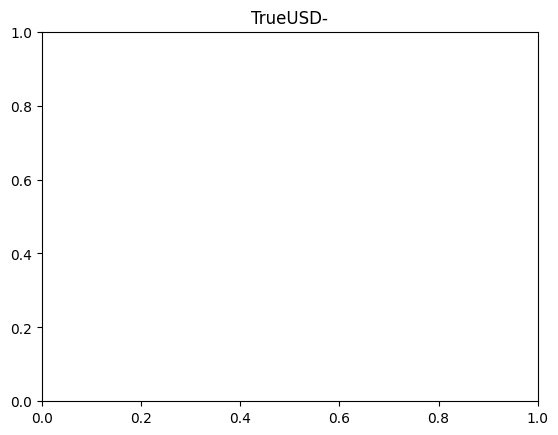

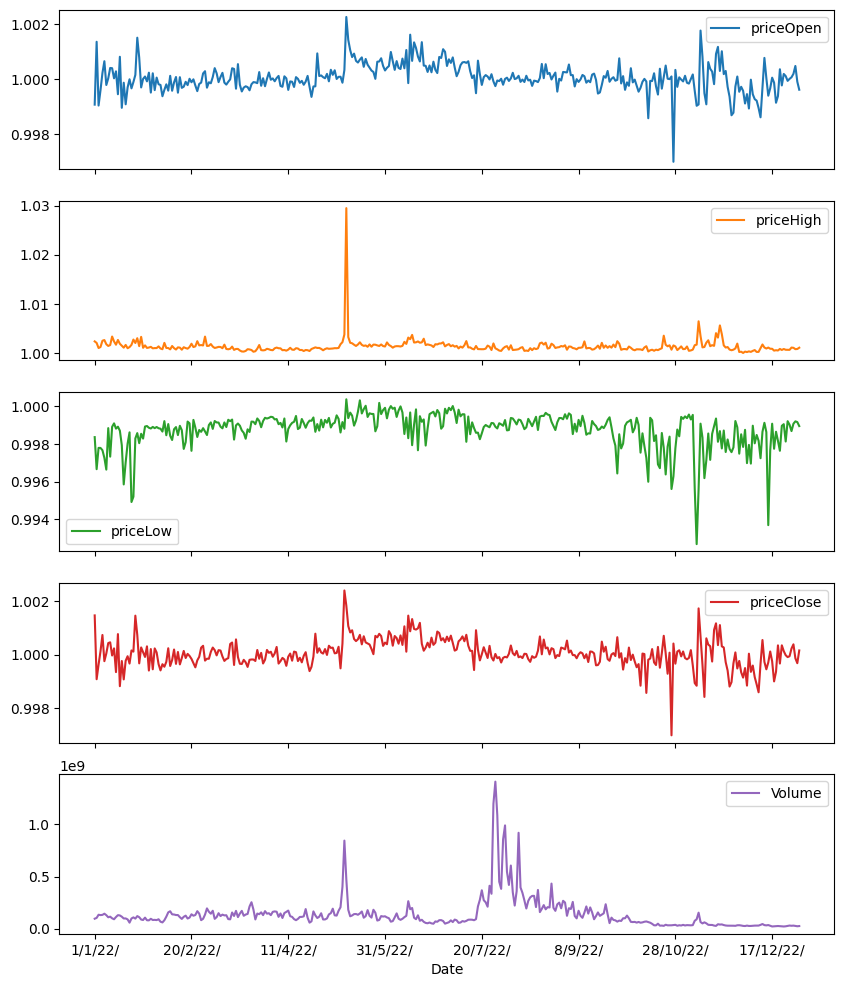

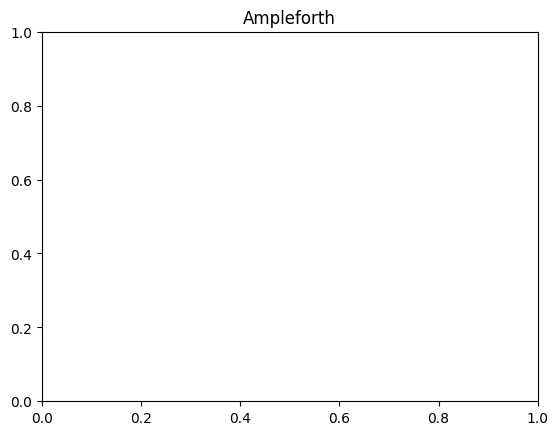

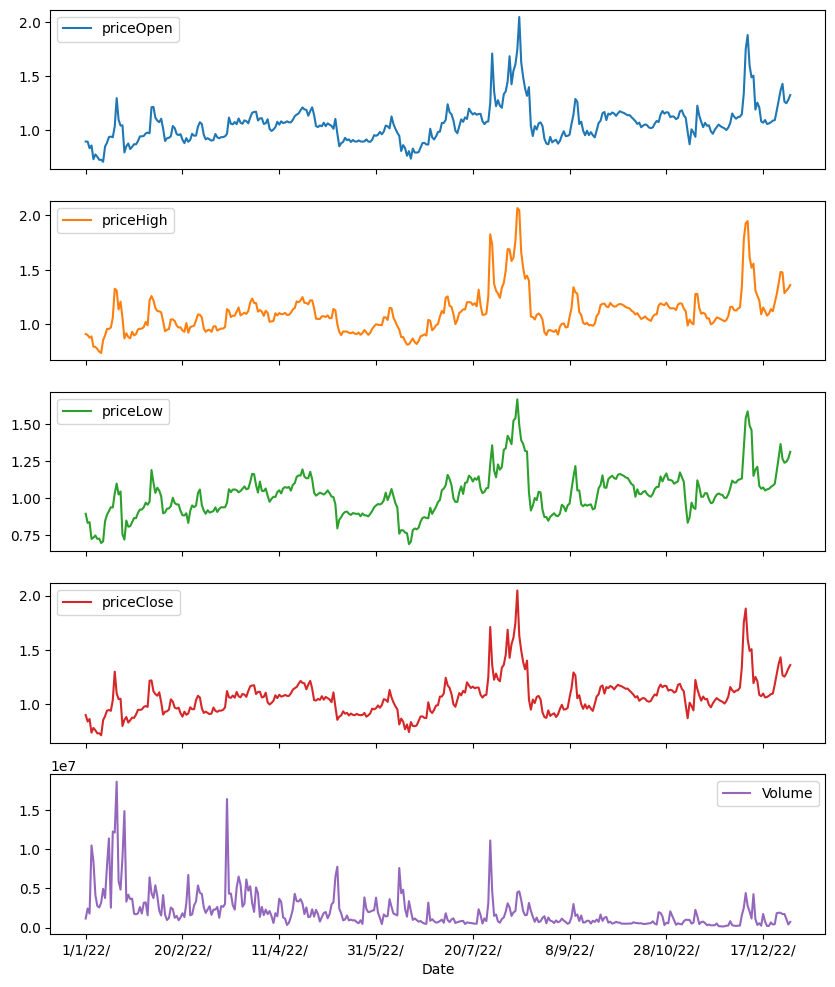

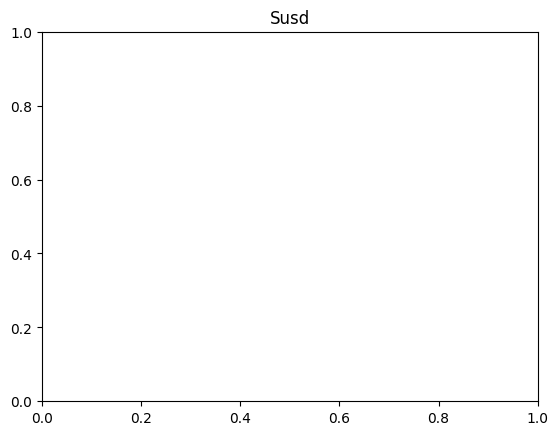

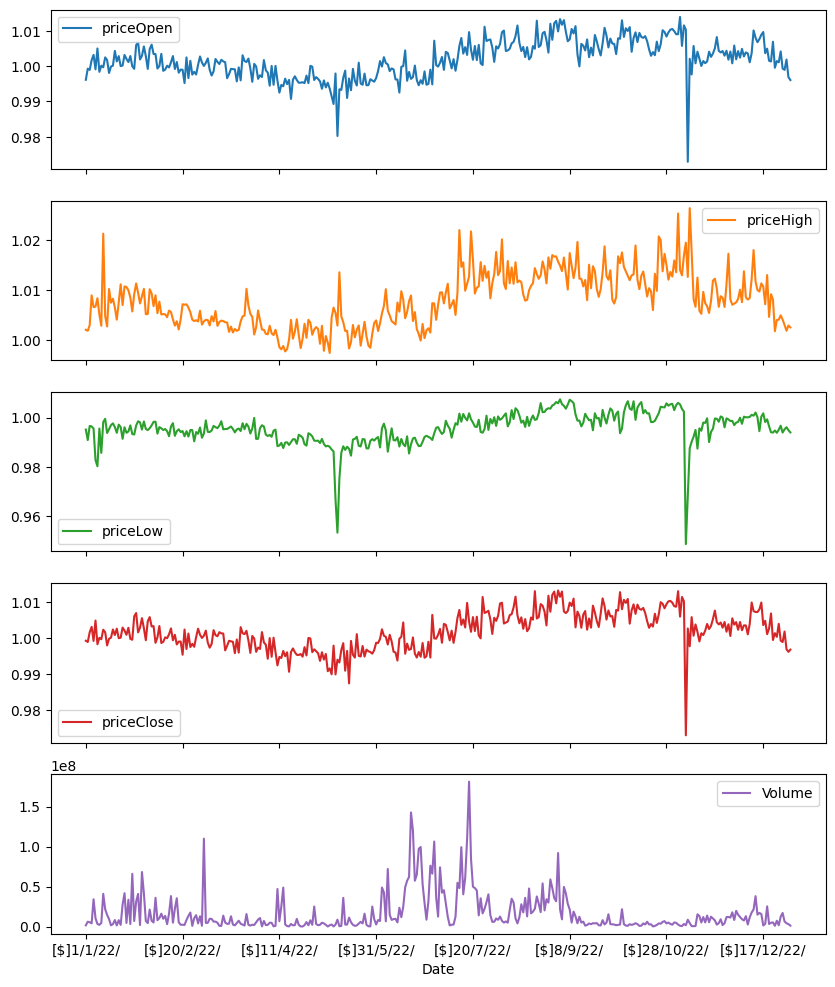

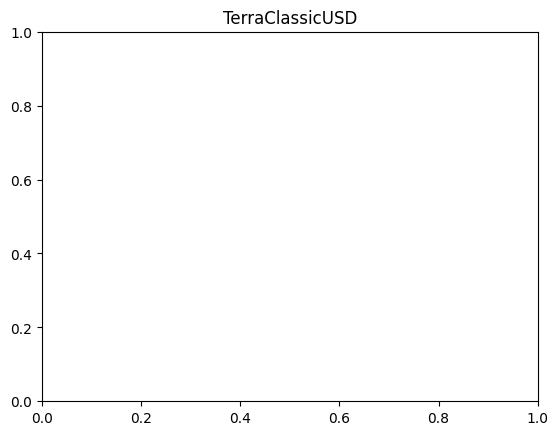

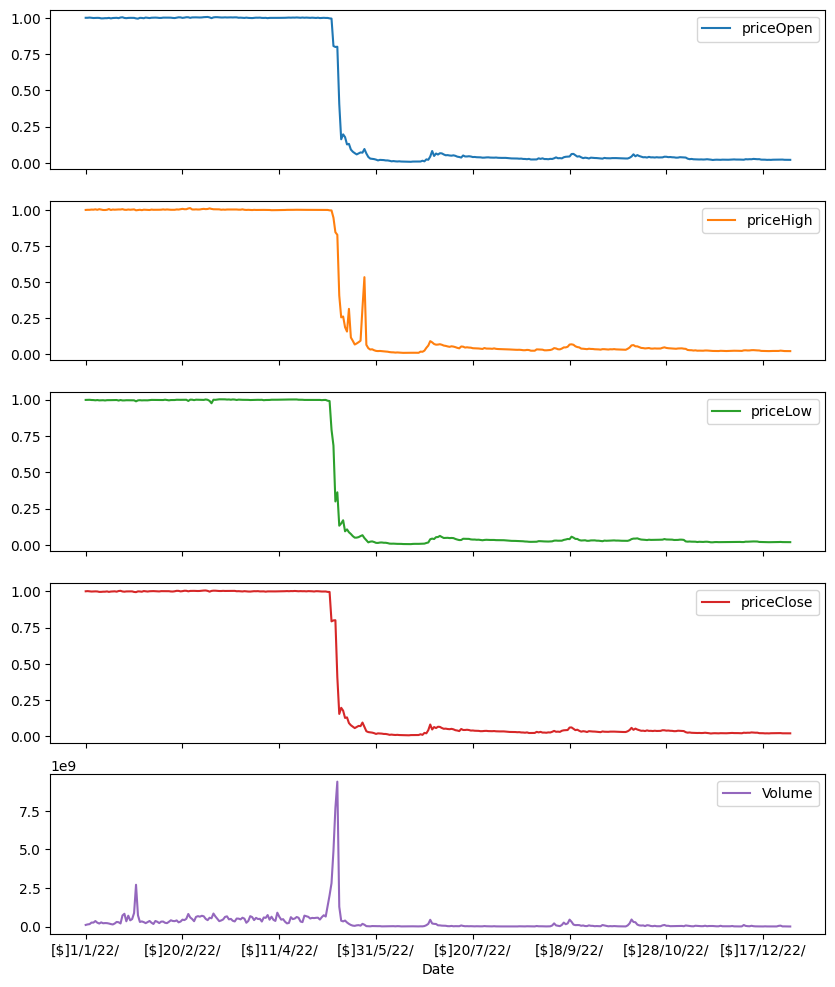

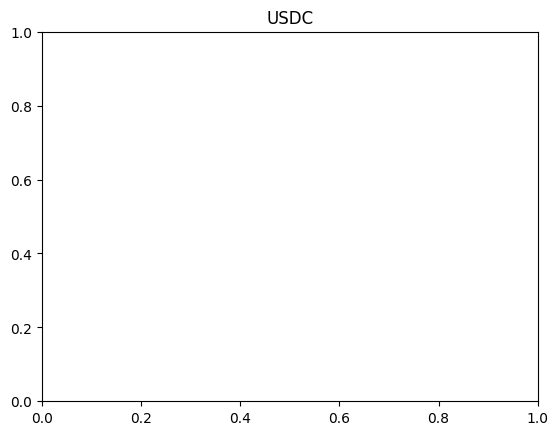

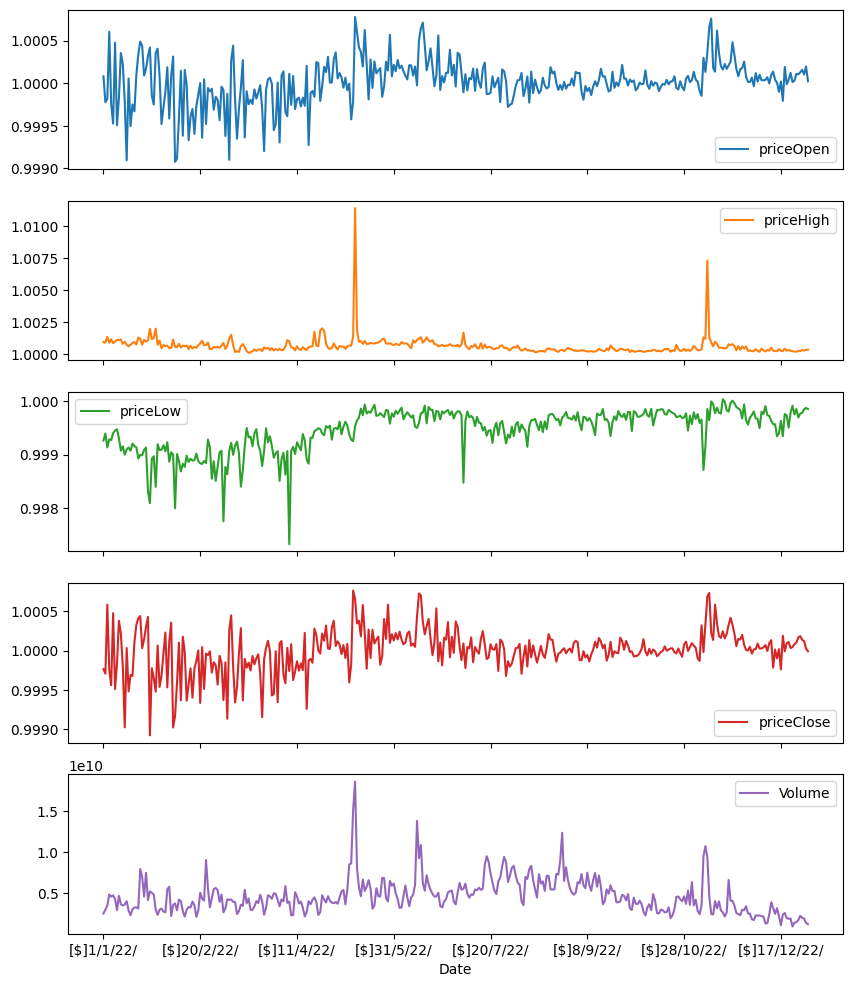

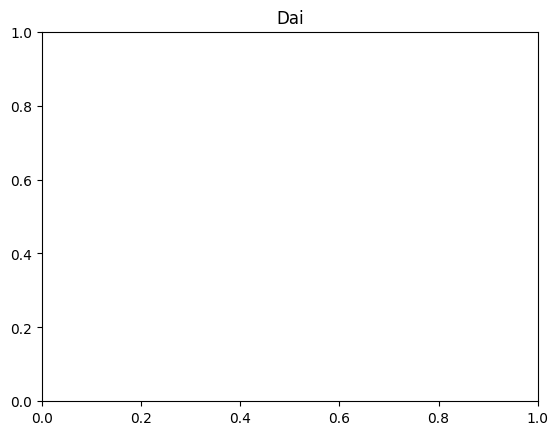

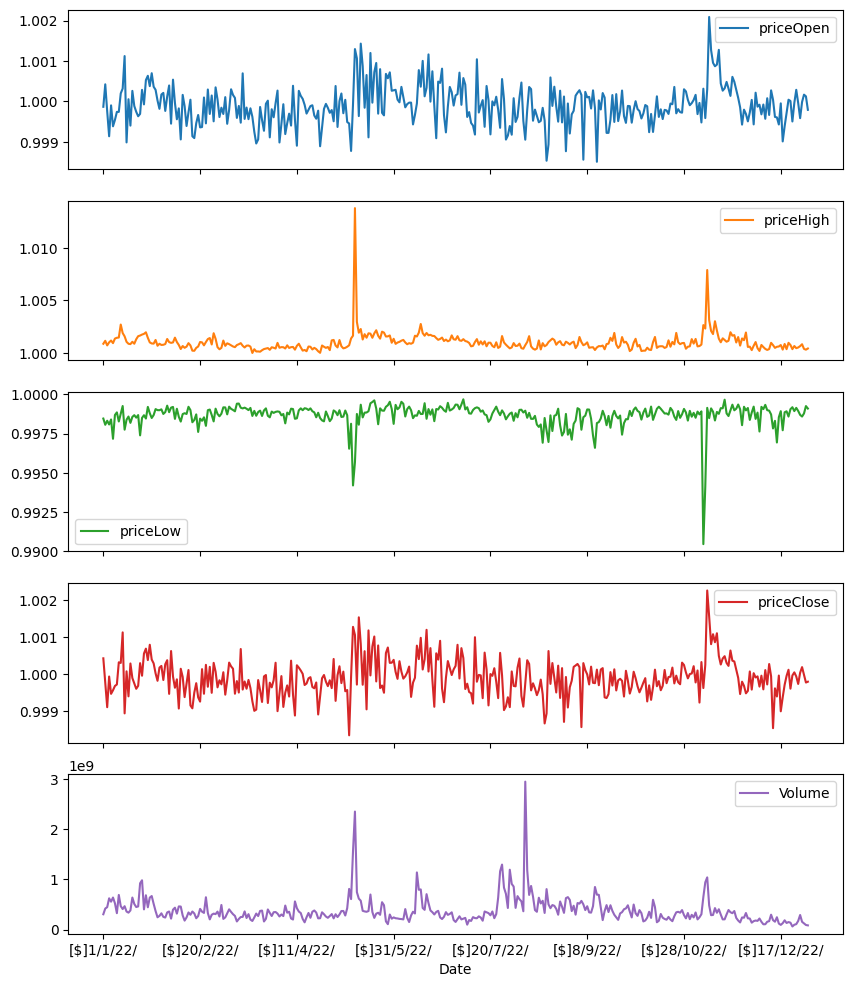

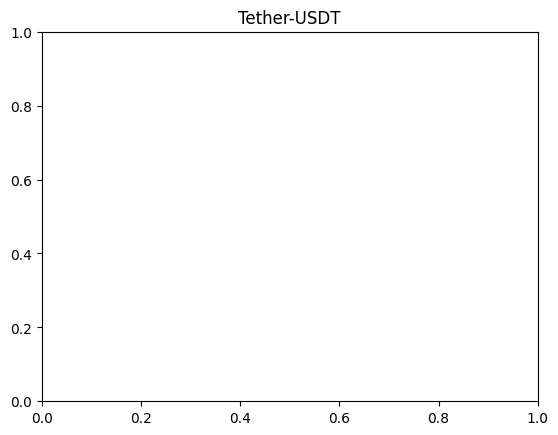

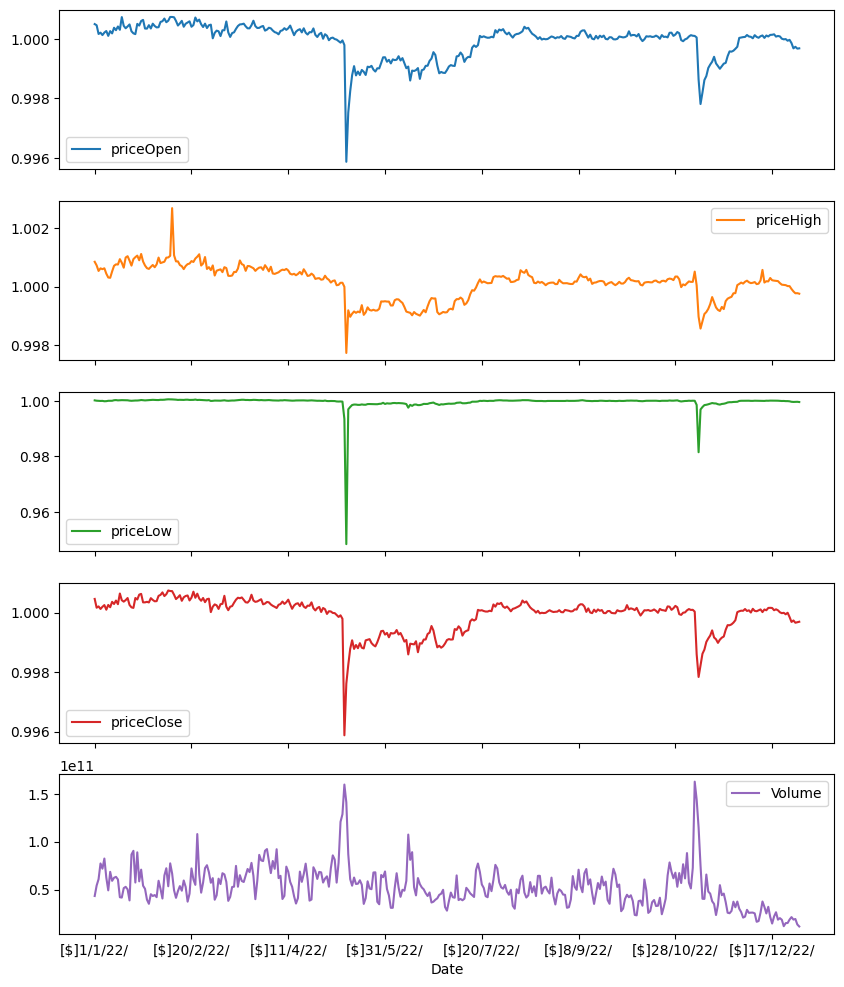

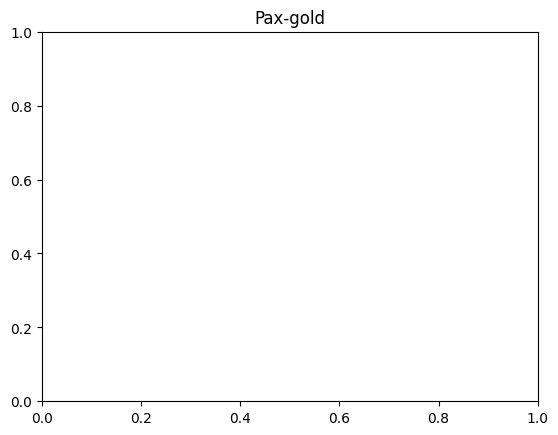

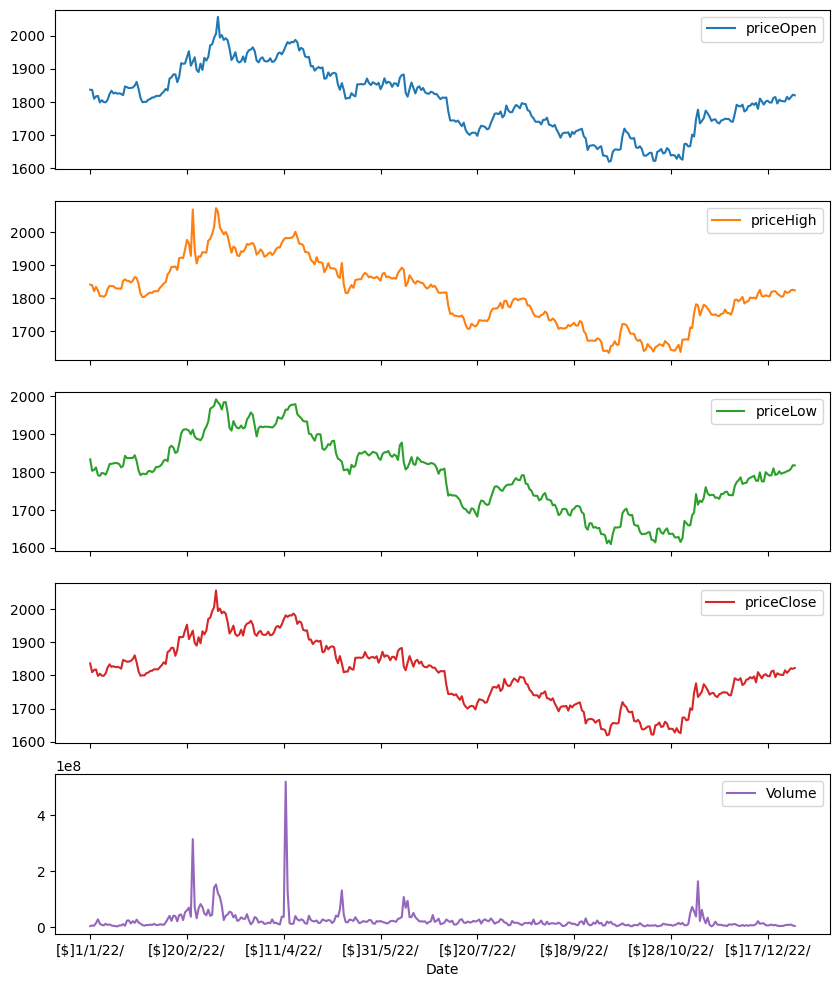

In [ ]:

import matplotlib.pyplot as plt

selected_columns = ['priceOpen', 'priceHigh', 'priceLow', 'priceClose', 'Volume']

# Loop through each coin and plot the selected columns
for coin_name, coin_data in coin_data_dict.items():

    # Plot selected columns as subplots
    plt.title(f'{coin_name}')
    coin_data[selected_columns].plot(subplots=True, figsize=(10, 12))
    #plt.title(f'{coin_name} coin attributes')
    plt.savefig(f'{coin_name}.png')
    plt.show()